# Trends on Data Science Question Topics 2021

Data Science Stack Exchange (DSSE) is a question and answer site for Data science professionals, Machine Learning specialists, and those interested in learning more about the field.


The DSSE home site subdivides into the categories
- Questions
- Tags
- Users
- Unanswered
- Jobs
- Companies 

For our purpose to analyse Data Science question topics, the **Question** and **Tags** groupings are most interesting.
The relevant Tags are shown within each single question page.

We want to acquire the data for this analysis through the Stack Exchange Data Explorer.

When checking the available tables for queries, the **posts** table seems to be the most interesting type of data.
Let's get the tags associated with posts and count them:

```
SELECT TOP 100 *
  FROM tags
 ORDER BY Count DESC;
```

https://data.stackexchange.com/datascience/query/1540533


| Id  | TagName          | Count | ExcerptPostId | WikiPostId | IsModeratorOnly | IsRequired |
|-----|------------------|-------|---------------|------------|-----------------|------------|
| 2   | machine-learning | 9924  | 4909          | 4908       |                 |            |
| 46  | python           | 5930  | 5523          | 5522       |                 |            |
| 194 | deep-learning    | 4247  | 8956          | 8955       |                 |            |
| 81  | neural-network   | 3973  | 8885          | 8884       |                 |            |
| 77  | classification   | 2849  | 4911          | 4910       |                 |            |
| 324 | keras            | 2580  | 9251          | 9250       |                 |            |
| 47  | nlp              | 2182  | 147           | 146        |                 |            |
| 321 | tensorflow       | 2020  | 9183          | 9182       |                 |            |
| 128 | scikit-learn     | 2013  | 5896          | 5895       |                 |            |
| 72  | time-series      | 1567  | 8904          | 8903       |                 |            |

The **Posts** Table has numerous fields:

| Posts                      |
|----------------------------|
| Users                      |
| Comments                   |
| Badges                     |
| CloseAsOffTopicReasonTypes |
| CloseReasonTypes           |
| FlagTypes                  |
| PendingFlags               |
| PostFeedback               |
| PostHistory                |
| PostHistoryTypes           |
| PostLinks                  |
| PostNotices                |
| PostNoticeTypes            |
| PostsWithDeleted           |
| PostTags                   |
| PostTypes                  |
| ReviewRejectionReasons     |
| ReviewTaskResults          |
| ReviewTaskResultTypes      |
| ReviewTasks                |
| ReviewTaskStates           |
| ReviewTaskTypes            |
| SuggestedEdits             |
| SuggestedEditVotes         |
| Tags                       |
| TagSynonyms                |
| Votes                      |
| VoteTypes                  |

Most of these are not that much relevant to this analysis, except for the **PostTags** and the **PostType** fields.

let's have a closer look on the various types of posts and check these for relevance

```
SELECT * FROM posttypes;
```

| Id | Name                |
|----|---------------------|
| 1  | Question            |
| 2  | Answer              |
| 3  | Wiki                |
| 4  | TagWikiExcerpt      |
| 5  | TagWiki             |
| 6  | ModeratorNomination |
| 7  | WikiPlaceholder     |
| 8  | PrivilegeWiki       |


```
SELECT PostTypes.Name, COUNT(*) as num
  FROM posts
LEFT JOIN PostTypes
ON posts.PostTypeId = PostTypes.Id
 GROUP BY PostTypes.Name
 ORDER BY PostTypes.Name ASC;
```

| Name                | num   |
|---------------------|-------|
| Answer              | 35253 |
| ModeratorNomination | 11    |
| Question            | 31894 |
| TagWiki             | 322   |
| TagWikiExcerpt      | 322   |
| WikiPlaceholder     | 1     |



It is obvious that the main post types of interest narrow down to **Questions and Answers**, as the other types do not have enough weight or a use case.

In order to stay timely relevant in this fast developing field of interest, I also confine the data to Questions of the year 2021 at the time of writing this early Jan '22.

Okay these query conditions translated to T-SQL I'll go along with this code:

```
SELECT Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
FROM posts
WHERE CreationDate >= '01.01.2021' AND CreationDate < '01.01.2022' AND PostTypeId IN (1,2)
```

resulting in this data (cutoff after 10 records)

| Id    | PostTypeId | CreationDate        | Score | ViewCount | Tags                                                                                | AnswerCount | FavoriteCount |
|-------|------------|---------------------|-------|-----------|-------------------------------------------------------------------------------------|-------------|---------------|
| 90018 | 1          | 2021-02-27 10:13:26 | 0     | 69        | neural-networknlprnnsequence-to-sequence                                    | 2           |               |
| 90020 | 1          | 2021-02-27 11:37:46 | 0     | 18        | lstmtransformerparameter                                                      | 0           |               |
| 90021 | 2          | 2021-02-27 12:57:10 | 0     |           |                                                                                     |             |               |
| 90023 | 1          | 2021-02-27 14:02:28 | 1     | 229       | machine-learningclusteringsimilarity                                          | 1           |               |
| 90026 | 1          | 2021-02-27 15:06:52 | 1     | 453       | machine-learningaccuracynaive-bayes-classifier                                | 1           |               |
| 90027 | 1          | 2021-02-27 16:08:02 | 0     | 63        | machine-learningregressionlinear-regressiongradient-descentlinear-algebra | 1           |               |
| 90028 | 2          | 2021-02-27 16:35:42 | 0     |           |                                                                                     |             |               |
| 90029 | 1          | 2021-02-27 16:38:59 | 0     | 69        | pythonpandasdata-cleaning                                                     | 1           |               |
| 90030 | 2          | 2021-02-27 17:59:29 | 1     |           |                                                                                     |             |               |
| 90031 | 2          | 2021-02-27 18:00:14 | 2     |           |                                                                                     |             |               |

for pandas I will import a file instead:

In [2]:
import pandas as pd

# importing filed query results
df = pd.read_csv('QueryResults.csv', parse_dates=['CreationDate'])

## Data Exploration

A lot of fields remain systematically empty in the queried data, in case of PostType 'Answer' the fields ```
'Viewcount', 'Tags', 'Answercount' , 'Favoritecount'```
are properties of the Question and not of each individual Answers. 

And the field Favoritecount has a lot of missing values just because probably not a lot of Questions have been tagged as such.

In terms of Postype 'Answer' is is really questionable if the remaining information in these Answer rows really is worth something, as just the date and score is populated and given the fact that the answercount is given in each Question already.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11733 entries, 0 to 11732
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             11733 non-null  int64         
 1   PostTypeId     11733 non-null  int64         
 2   CreationDate   11733 non-null  datetime64[ns]
 3   Score          11733 non-null  int64         
 4   ViewCount      6765 non-null   float64       
 5   Tags           6765 non-null   object        
 6   AnswerCount    6765 non-null   float64       
 7   FavoriteCount  554 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 733.4+ KB


The Data types for the table fields seem adequate for now.

The 'Tags' field has all tags concatenated with a Separator, this is one thing that we need to wrangle with in order to be able to work with any Tag.

In [4]:
import numpy as np

# clean the tags column for list use by removing/replacing greater/less than chars and removing last comma
df['Tags'] = df.Tags.str.replace('<', '').str.replace('>', ',' )#.str.rstrip(',')

# fill missing values with zeros
df = df.fillna(0)

# rationalize columns to appropiate data type as we deal with low integer values and not floats
df = df.astype({'ViewCount': np.int64, 'AnswerCount': np.int64, 'FavoriteCount': np.int64})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11733 entries, 0 to 11732
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             11733 non-null  int64         
 1   PostTypeId     11733 non-null  int64         
 2   CreationDate   11733 non-null  datetime64[ns]
 3   Score          11733 non-null  int64         
 4   ViewCount      11733 non-null  int64         
 5   Tags           11733 non-null  object        
 6   AnswerCount    11733 non-null  int64         
 7   FavoriteCount  11733 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 733.4+ KB


In [6]:
# one large list
taglist = df.Tags.tolist()
# remove the zeros
taglist = [i for i in taglist if i != 0 and i != '']
# union
string = ''.join(taglist)
# split into elements by comma
taglist = string.split(",")
taglist = taglist[:-1] #last element always empty
len(taglist)

21359

In [7]:
taglist[-4:]

['cost-function', 'machine-learning', 'neural-network', 'predictive-modeling']

In [8]:
tagfreq = pd.Series(taglist).value_counts().sort_index().reset_index().reset_index(drop=True)
tagfreq.columns = ['Tag', 'TagCount']
tagfreq = tagfreq[tagfreq['Tag'] != '']
tagfreq = tagfreq.set_index('Tag')

# tag assignment frequency
tagfreq = tagfreq.sort_values('TagCount', ascending=False)#[0:20]

tagfreq.index[0:20]
#tagfreq

Index(['machine-learning', 'python', 'deep-learning', 'neural-network', 'nlp',
       'keras', 'classification', 'tensorflow', 'time-series', 'scikit-learn',
       'dataset', 'cnn', 'regression', 'pandas', 'pytorch', 'clustering',
       'lstm', 'statistics', 'convolutional-neural-network',
       'machine-learning-model'],
      dtype='object', name='Tag')

In [9]:
df.iloc[0,:].Tags.split(",")

['neural-network', 'nlp', 'rnn', 'sequence-to-sequence', '']

In [10]:
%%time
# cumulated question viewcount with tag assigned
tagfreq['ViewCount'] = 0

def tag_counter(itag, df, targetcol=5, count=0):
    for row in df.itertuples(index=False):
        if itag in row[targetcol].split(","):
            count += row.ViewCount
    return count
                                                
for itag in tagfreq.index:
    tagfreq.at[itag,'ViewCount'] = tag_counter(itag, df[df.PostTypeId == 1])
    
tagfreq.iloc[0:20,:]

# Wall time: 5min 38s | for index, row in df.iterrows():

Wall time: 13.5 s


,TagCount,ViewCount
Tag,,
machine-learning,1790,111468
python,1247,147464
deep-learning,976,72704
neural-network,622,35171
nlp,552,39667
keras,547,62558
classification,538,32304
tensorflow,537,62481
time-series,418,24856


In [11]:
tagfreq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, machine-learning to project-planning
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TagCount   603 non-null    int64
 1   ViewCount  603 non-null    int64
dtypes: int64(2)
memory usage: 34.1+ KB


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_style('dark')
sns.set(rc={"figure.figsize":(12, 8)})

def plot_certain_tags(df=tagfreq, x='TagCount', y='ViewCount', h=0, i=30):
    sns.scatterplot(x=x, y=y, data=df.iloc[h:i,:],linewidth=1, alpha = 1,edgecolor="black")
    for x,y,label,num in zip(df['TagCount'][h:i], df.ViewCount[h:i], df.index[h:i], np.arange(h,i)):
        plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10*[-1,1][random.randrange(2)]), ha='center')
    plt.show()

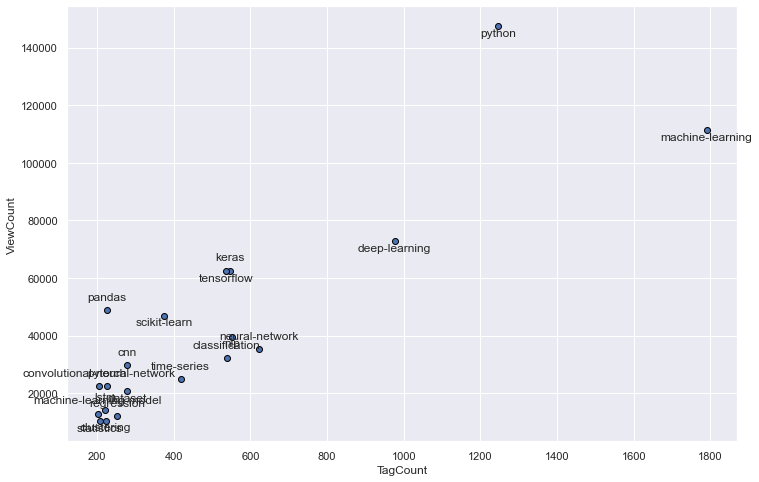

In [13]:
plot_certain_tags(h=0, i=20)

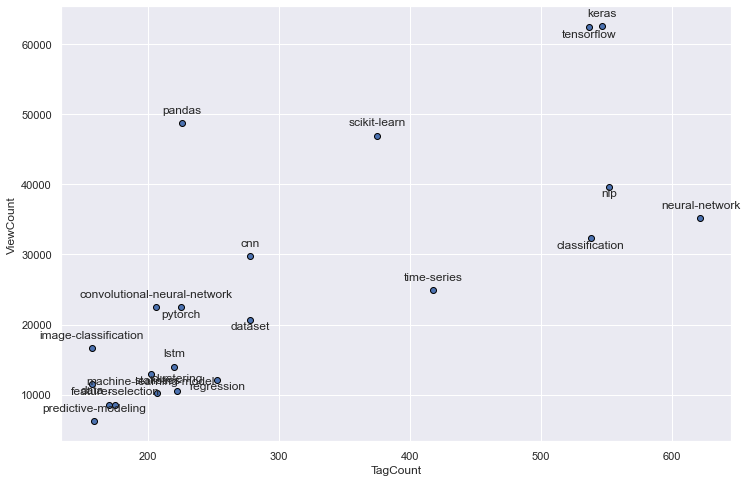

In [95]:
plot_certain_tags(h=3, i=25)

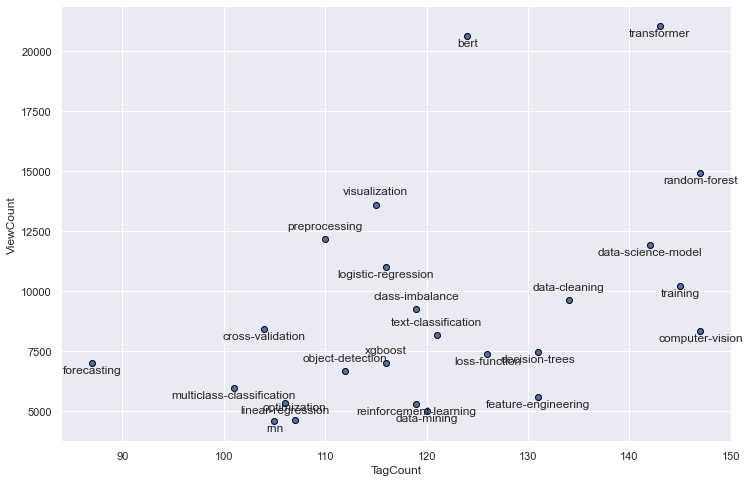

In [96]:
plot_certain_tags(h=25, i=50)

Both Tagcount and Question-Viewcount are very strongly correlated to each other and from the plots can be deduced that this relationship is fairly linear.

In [16]:
tagfreq.corr()

,TagCount,ViewCount
TagCount,1.000000,0.931483
ViewCount,0.931483,1.000000


In [17]:
TC20 = tagfreq.index[0:20]
VC20 = tagfreq.sort_values('ViewCount', ascending=False).index[0:20]

In [18]:
# tags that are in TC20 & VC20
set(TC20).intersection(VC20)

{'classification',
 'cnn',
 'convolutional-neural-network',
 'dataset',
 'deep-learning',
 'keras',
 'machine-learning',
 'neural-network',
 'nlp',
 'pandas',
 'python',
 'pytorch',
 'scikit-learn',
 'tensorflow',
 'time-series'}

In [19]:
# tags that are in Top20 only in one list
set(TC20) ^ set(VC20)
set(TC20).symmetric_difference(VC20)

{'bert',
 'clustering',
 'image-classification',
 'lstm',
 'machine-learning-model',
 'matplotlib',
 'numpy',
 'regression',
 'statistics',
 'transformer'}

In [20]:
# tags that are in TC20 only
set(np.setdiff1d(TC20,VC20))

{'clustering', 'lstm', 'machine-learning-model', 'regression', 'statistics'}

In [21]:
# tags that are in VC20 only
set(np.setdiff1d(VC20,TC20))

{'bert', 'image-classification', 'matplotlib', 'numpy', 'transformer'}

### Data Year 2021 Conclusion

We can state that there is a heavy weight on **deep learning** related questions from the tag lists that we have produced, this is data from 2021 and we know from previous date that this has been similar in 2019.

So let us dig in deeper into that and consider which questions do we want to count as being related to **deep learning** and how can we classify the appropiate questions as deep learning questions?
We have to find an implementation for this.

We will waive to compare tag pairings via a matrix and heatmaps or solely hand pick a few tags.

Instead we favor to mine our data by generating association rules from the frequency tag sets in order to systematically get a better grip of relations among the tags.

We will use the apriori algorithm to extract frequent tagsets in order to prepare the generation of association rules.

### Tag Data Mining


In [22]:
%%time
# Custom One Hot Encoding

tagset = set(taglist)

def DSSE_one_hot_encoder(tagset, targetcol=5, df=df):
    encoded_df = pd.DataFrame(columns=list(tagset))
    for question in df.itertuples():
        question_set = set(question[targetcol+1].rstrip(',').split(","))
        unc_list = list(tagset - question_set)
        com_list = list(tagset.intersection(question_set))
        d1 = {key:0 for key in unc_list} # dict comprehension
        d2 = {key:1 for key in com_list}
        d1.update(d2)
        encoded_df.loc[question.Index] = d1
    return encoded_df

testdf = DSSE_one_hot_encoder(tagset, targetcol=5, df=df[df.PostTypeId == 1])
testdf.sample(3)

Wall time: 9min 49s


,indexing,attention-mechanism,ethics,metaheuristics,multi-instance-learning,lstm,bioinformatics,topic-model,distribution,predictor-importance,...,scikit-learn,neural-network,aggregation,excel,simulation,logarithmic,c++,probabilistic-programming,convolutional-neural-network,bernoulli
1939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Apriori will supply us with 

In [24]:
%%time
from mlxtend.frequent_patterns import apriori, association_rules

# Apriori
Apriori_tags = apriori(testdf, min_support=0.00035, use_colnames=True, verbose=1)
print(Apriori_tags.head(7))
len(Apriori_tags)

Processing 6 combinations | Sampling itemset size 6e 5 4
       support                   itemsets
0  0.000739098                 (indexing)
1   0.00857354      (attention-mechanism)
2  0.000591279  (multi-instance-learning)
3    0.0325203                     (lstm)
4  0.000591279           (bioinformatics)
5   0.00517369              (topic-model)
6   0.00413895             (distribution)
Wall time: 5min 20s


3657

When mining the association rules we try a few metrics to determine if the relation of two tags or more is really statistically significant and not independent. For that to test we have a few metrics to choose from and will test them on the mined rules. After a few test we choose to pick the metric 'lift':

$\text{lift}(A\rightarrow C) = \frac{\text{confidence}(A\rightarrow C)}{\text{support}(C)}, \;\;\; \text{range: } [0, \infty]$

If tags A and C are to be statistically independent, the lift metric will have the value 1. The metric gives the factor by which the antecedent and consequent of a rule occur together in comparison to random chance and statistical independence.

Together with domain knowledge we eyeball the min threshold to be 15, as then some tags not specifically related to deep-learning like 

```
'feature extraction'
'python'
```
get sorted out.

In [54]:
chosen_metric = 'lift'
thresholds = {'lift': 15, 'conviction': 1, 'leverage': 0.0001}

rules = association_rules(Apriori_tags, metric=chosen_metric, min_threshold=thresholds[chosen_metric])
rules.sort_values(chosen_metric, ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
898,(numerical),"(categorical-data, feature-engineering)",0.000591,0.000591,0.000443,0.750000,1268.437500,0.000443,3.997635
895,"(categorical-data, feature-engineering)",(numerical),0.000591,0.000591,0.000443,0.750000,1268.437500,0.000443,3.997635
529,"(dimensionality-reduction, visualization)",(tsne),0.000443,0.001922,0.000443,1.000000,520.384615,0.000443,inf
532,(tsne),"(dimensionality-reduction, visualization)",0.001922,0.000443,0.000443,0.230769,520.384615,0.000443,1.299424
1411,"(python, seaborn)","(matplotlib, pandas)",0.000739,0.001183,0.000443,0.600000,507.375000,0.000443,2.497044
...,...,...,...,...,...,...,...,...,...
893,(arima),"(deep-learning, time-series)",0.003991,0.007391,0.000443,0.111111,15.033333,0.000414,1.116685
890,"(deep-learning, time-series)",(arima),0.007391,0.003991,0.000443,0.060000,15.033333,0.000414,1.059584
1316,"(deep-learning, time-series)","(machine-learning, lstm)",0.007391,0.005322,0.000591,0.080000,15.033333,0.000552,1.081172
147,(linear-regression),(lasso),0.015669,0.002513,0.000591,0.037736,15.016648,0.000552,1.036604


In [55]:
# collect all tags where the tag 'deep-learning' is in any of antecedents or consequents sets

def collect_associated_tags(df=rules, targetcols=(0,1), source_tag='deep-learning'):
    target_tags = set()
    for rule in rules.itertuples(index=False):
        rule_tag_set = set(rule[targetcols[0]])
        rule_tag_set.update(set(rule[targetcols[1]]))
        if source_tag in rule_tag_set:
            target_tags.update(rule_tag_set)
    target_tags.discard(source_tag)
    return target_tags

associated_tags = collect_associated_tags()
print(len(associated_tags))
associated_tags

41


{'activation-function',
 'arima',
 'attention-mechanism',
 'bert',
 'cnn',
 'computer-vision',
 'convolution',
 'convolutional-neural-network',
 'data-augmentation',
 'data-science-model',
 'dqn',
 'faster-rcnn',
 'forecasting',
 'gan',
 'generative-models',
 'gradient-descent',
 'huggingface',
 'image-classification',
 'keras',
 'language-model',
 'lstm',
 'machine-learning',
 'masking',
 'mini-batch-gradient-descent',
 'neural-network',
 'nlp',
 'object-detection',
 'policy-gradients',
 'python',
 'pytorch',
 'q-learning',
 'reinforcement-learning',
 'rnn',
 'semantic-segmentation',
 'siamese-networks',
 'tensorflow',
 'time-series',
 'training',
 'transformer',
 'validation',
 'yolo'}

Applying domain knowledge we remove tags that represent general concepts, languages, application types, algorithms etc that are not predominantly related to deep learning:

In [56]:
associated_tags = associated_tags - set(['machine-learning', 'data-augmentation', 'arima', 'data-science-model', 'forecasting', 'gradient-descent', 'mini-batch-gradient-descent', 'python', 'time-series', 'validation'])
associated_tags

{'activation-function',
 'attention-mechanism',
 'bert',
 'cnn',
 'computer-vision',
 'convolution',
 'convolutional-neural-network',
 'dqn',
 'faster-rcnn',
 'gan',
 'generative-models',
 'huggingface',
 'image-classification',
 'keras',
 'language-model',
 'lstm',
 'masking',
 'neural-network',
 'nlp',
 'object-detection',
 'policy-gradients',
 'pytorch',
 'q-learning',
 'reinforcement-learning',
 'rnn',
 'semantic-segmentation',
 'siamese-networks',
 'tensorflow',
 'training',
 'transformer',
 'yolo'}

Okay we have found our set of tags that can be used to define questions as **deep-learning** questions.

Now we can track interest in deep learning and have a look over a widened time horizon how deep learning related questions have developed over time by fetching all-time tag related data.



### Alltime question data

In [29]:
allquest = pd.read_csv('all_questions_Jan22.csv', parse_dates=['CreationDate'])

In [30]:
# processing tags

# comma separate
allquest['Tags'] = allquest.Tags.str.replace('<', '').str.replace('>', ',' )#.str.rstrip(',')
# one large list
taglist = allquest.Tags.tolist()
# remove the zeros
taglist = [i for i in taglist if i != 0 and i != '']
# union
string = ''.join(taglist)
# split into elements by comma
taglist = string.split(",")  
len(taglist)

97297

In [31]:
# counting tag assignments
alltime_tagfreq = pd.Series(taglist).value_counts().sort_index().reset_index().reset_index(drop=True)
alltime_tagfreq.columns = ['Tag', 'TagCount']
alltime_tagfreq = alltime_tagfreq[alltime_tagfreq['Tag'] != '']
alltime_tagfreq = alltime_tagfreq.set_index('Tag')
alltime_tagfreq = alltime_tagfreq.sort_values('TagCount', ascending=False)#[0:20]

alltime_tagfreq.index[0:20]

Index(['machine-learning', 'python', 'deep-learning', 'neural-network',
       'classification', 'keras', 'nlp', 'tensorflow', 'scikit-learn',
       'time-series', 'r', 'regression', 'dataset', 'clustering', 'cnn',
       'pandas', 'data-mining', 'predictive-modeling', 'lstm', 'statistics'],
      dtype='object', name='Tag')

In [33]:
alltime_tagfreq.head()

,TagCount
Tag,
machine-learning,9924
python,5930
deep-learning,4247
neural-network,3973
classification,2849


In [34]:
%%time
# counting cumulated question views with tag assigned

alltime_tagfreq['ViewCount'] = 0
                                             
for itag in alltime_tagfreq.index:
    alltime_tagfreq.at[itag,'ViewCount'] = tag_counter(itag=itag, df=allquest, targetcol=2)
    
alltime_tagfreq.iloc[0:20,:]

Wall time: 1min 1s


,TagCount,ViewCount
Tag,,
machine-learning,9924,16701409
python,5930,17462725
deep-learning,4247,8044329
neural-network,3973,8265696
classification,2849,3734893
keras,2580,5921240
nlp,2182,2532639
tensorflow,2020,3330990
scikit-learn,2013,6524716


now lets label these questions in allquest that we consider deep-learning questions:

In [35]:
def label_deep_learning(qtags, associated_tags=associated_tags):
    if (True in [(t in associated_tags) for t in qtags]): return True 
    else: return False

In [36]:
%%time
allquest['deep-learning'] = allquest.Tags.apply(lambda x: label_deep_learning(x.split(",")))

Wall time: 41 ms


In [37]:
allquest.head()

,Id,CreationDate,Tags,ViewCount,deep-learning
0,90018,2021-02-27 10:13:26,"neural-network,nlp,rnn,sequence-to-sequence,",69,True
1,90020,2021-02-27 11:37:46,"lstm,transformer,parameter,",18,True
2,90023,2021-02-27 14:02:28,"machine-learning,clustering,similarity,",229,False
3,90026,2021-02-27 15:06:52,"machine-learning,accuracy,naive-bayes-classifier,",453,False
4,90027,2021-02-27 16:08:02,"machine-learning,regression,linear-regression,...",63,False


Now that we have labels attached, we can explore this deep-learning subset further:

- We check the how the frequency of deep learning questions evolves over time.
- And how the ratio of deep-learning developed over time and if & how much it gained importance.

In [39]:
quarterly = allquest[allquest['deep-learning'] == True].resample('Q', on='CreationDate').count()
quarterly.sample(2)

,Id,CreationDate,Tags,ViewCount,deep-learning
CreationDate,,,,,
2016-06-30,120,120,120,120,120
2017-09-30,255,255,255,255,255


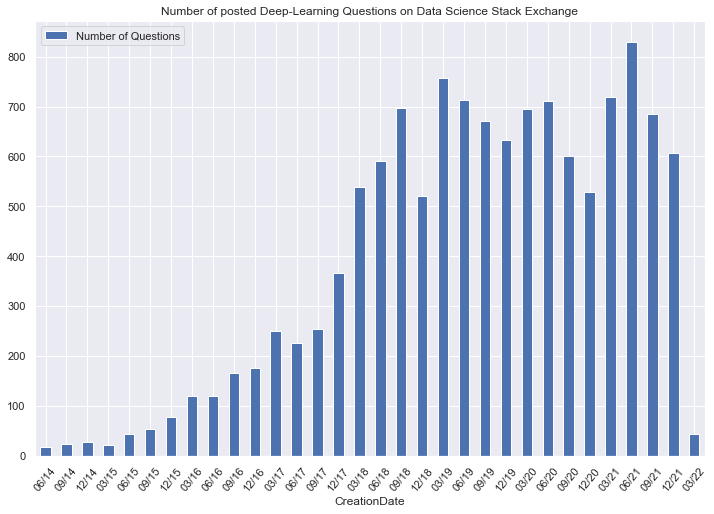

In [40]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns

ax = quarterly.plot(kind='bar', use_index=True, y='Id', rot=50)
ax.legend(["Number of Questions"]);
x_labels = quarterly.index.strftime('%m/%y')
ax.set_xticklabels(x_labels)
plt.title('Number of posted Deep-Learning Questions on Data Science Stack Exchange')
plt.show()

At the time of data extraction 1st Quarter of 2022 just had startede, we will remove this incomplete quarter in successive analyses.

Lets move on with 

In [60]:
nonquarterly = allquest[allquest['deep-learning'] == False].resample('Q', on='CreationDate').count()
nonquarterly = nonquarterly.drop(['CreationDate','Tags','ViewCount','deep-learning'], axis=1)
nonquarterly.tail(2)

,Id
CreationDate,
2021-12-31,902
2022-03-31,91


In [58]:
# create a dictonary
data = {"non_dl": nonquarterly.Id,
        "dl": quarterly.Id}

combined_quarterly = pd.DataFrame(data )
combined_quarterly.drop(combined_quarterly.tail(1).index,inplace=True) # drop last incomplete quarter
combined_quarterly.tail(2)

,non_dl,dl
CreationDate,,
2021-09-30,910,685
2021-12-31,902,607


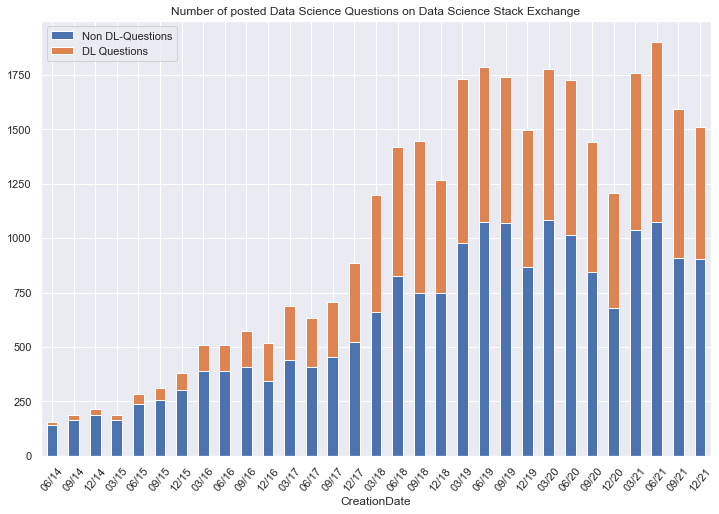

In [62]:
ax = combined_quarterly.plot(kind='bar', use_index=True, stacked=True, rot=50)
ax.legend(["Non DL-Questions", "DL Questions"]);
x_labels = combined_quarterly.index.strftime('%m/%y')
ax.set_xticklabels(x_labels)
plt.title('Number of posted Data Science Questions on Data Science Stack Exchange')
plt.show()

The overall growth of Data Science questions on the Data Science Exchange stagnates for 3 years now already.

In [73]:
combined_quarterly.loc['2019-03-31':,:].sum(axis=1).mean().round()

1640.0

In [72]:
combined_quarterly.loc['2019-03-31':,:].sum(axis=1).std().round()

194.0

Since 2019 the number of Questions overall per Quarter oscillates around a mean of 1640 with a Standard Deviation of 194.

Let's check the ratios as well:

In [90]:
comb_ratio_quarterly = combined_quarterly.copy()
comb_ratio_quarterly['total'] = comb_ratio_quarterly.sum(axis=1) # row summing

In [91]:
comb_ratio_quarterly.non_dl = comb_ratio_quarterly.non_dl /  comb_ratio_quarterly.total
comb_ratio_quarterly.dl = comb_ratio_quarterly.dl /  comb_ratio_quarterly.total
comb_ratio_quarterly = comb_ratio_quarterly.drop('total', axis=1)
comb_ratio_quarterly.drop(comb_ratio_quarterly.tail(1).index,inplace=True) # drop last incomplete quarter

In [93]:
comb_ratio_quarterly.sample(2)

,non_dl,dl
CreationDate,,
2021-09-30,0.570533,0.429467
2020-12-31,0.562914,0.437086


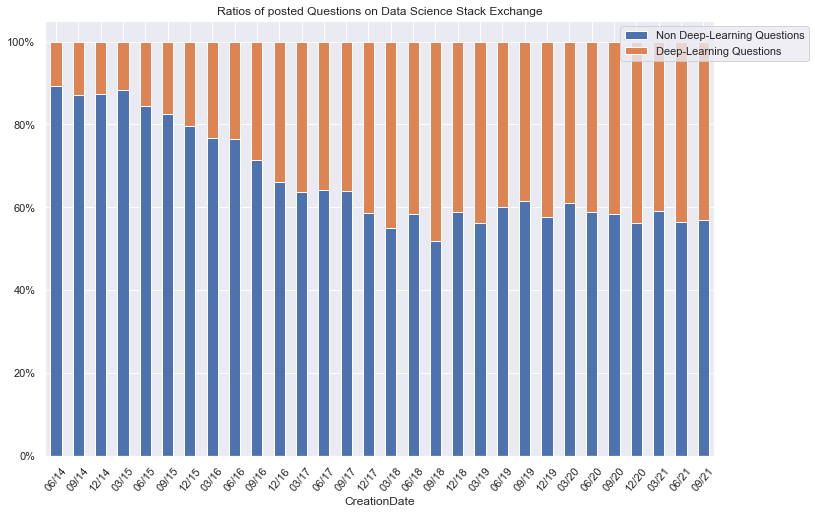

In [94]:
import matplotlib.ticker as mtick

ax = comb_ratio_quarterly.plot(kind='bar', use_index=True, stacked=True, rot=50)
ax.legend(["Non Deep-Learning Questions", "Deep-Learning Questions"]);
x_labels = comb_ratio_quarterly.index.strftime('%m/%y')
ax.set_xticklabels(x_labels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Ratios of posted Questions on Data Science Stack Exchange')
plt.legend(["Non Deep-Learning Questions", "Deep-Learning Questions"], bbox_to_anchor=(1,1), loc="upper center")
plt.show()

### Conclusion

The strong trend of deep-learning related questions in the early years had lost steam with the end of the year 2018 and entered a stable sideways trend, keeping a good share of 40% for now 3 years pretty stable. This is true for both Data Science questions in general and Deep-Learning questions in particular.